In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt                                                                         

# Load dataset


In [2]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
target_labels = ['airplane', 
                 'automobile',
                 'bird',
                 'cat',
                 'deer',
                 'dog',
                 'frog',
                 'horse',
                 'ship',
                 'truck']

# Summarize loaded dataset

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


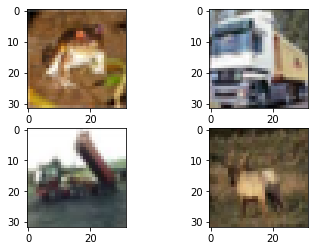

In [4]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X[i])
pyplot.show()

# Cnvert to grayscale

In [5]:
import cv2

train_X_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_X])
test_X_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_X])

Train: X=(50000, 32, 32), y=(50000, 1)
Test: X=(10000, 32, 32), y=(10000, 1)


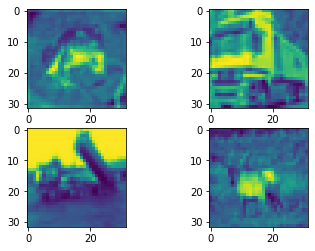

In [6]:
print('Train: X=%s, y=%s' % (train_X_grayscale.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X_grayscale.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X_grayscale[i])
pyplot.show()

In [7]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [8]:
train_X = train_X.reshape(np.shape(train_X)[0], -1)
test_X = test_X.reshape(np.shape(test_X)[0], -1)

# one hot y values
train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

# Preprocessing

In [9]:
# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [10]:
# split training hyperpatameters batch
split = int(train_X.shape[0] * 0.2)
hyperbatch_X = train_X[:split]
hyperbatch_Y = train_Y[:split]
hyperbatch_X.shape

(10000, 3072)

# Define model

In [11]:
# split training hyperpatameters batch for validation
split = int(hyperbatch_X.shape[0] * 0.2)
hyperbatch_X_val = hyperbatch_X[:split]
hyperbatch_Y_val = hyperbatch_Y[:split]

hyperbatch_X = hyperbatch_X[split:]
hyperbatch_Y = hyperbatch_Y[split:]

In [12]:
def choose_hyperparams(nodes_number, activation):
  # define model
  model = Sequential()
  # define layeres
  model.add(Dense(nodes_number, activation=activation, input_dim=hyperbatch_X.shape[1]))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  # compile and fit
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)

  print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
  return history

In [13]:
def draw_acc_loss_plt(history):
  # acc
  plt.plot(history.history['acc'], 'b-')
  plt.plot(history.history['val_acc'], 'r-')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # loss
  plt.plot(history.history['loss'], 'b-')
  plt.plot(history.history['val_loss'], 'r-')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

## First layer's neuron size

### neuron size: 20

loss: 1.6581308841705322, accuracy: 0.4257499873638153, val_loss: 1.7371859550476074, val_accuracy: 0.3955000042915344



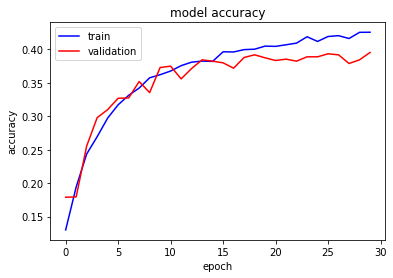

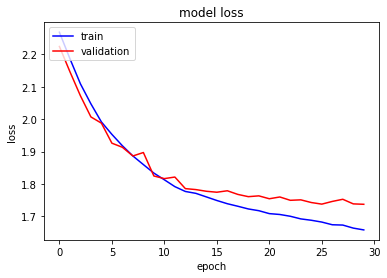

In [14]:
history = choose_hyperparams(20, 'relu')
draw_acc_loss_plt(history)

### neuron size: 200

loss: 1.3056397438049316, accuracy: 0.5516250133514404, val_loss: 1.616178035736084, val_accuracy: 0.42800000309944153



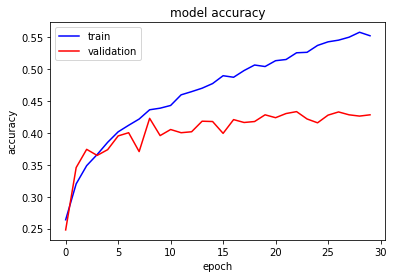

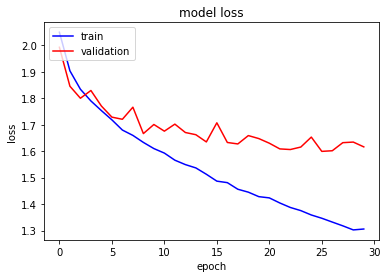

In [15]:
history = choose_hyperparams(200, 'relu')
draw_acc_loss_plt(history)

### neuron size: 1000

loss: 1.0392460823059082, accuracy: 0.6527500152587891, val_loss: 1.676650047302246, val_accuracy: 0.4320000112056732



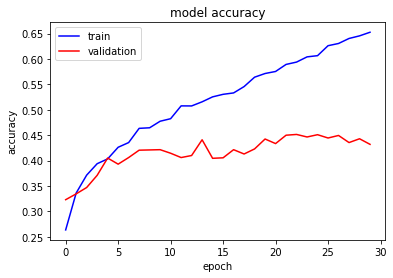

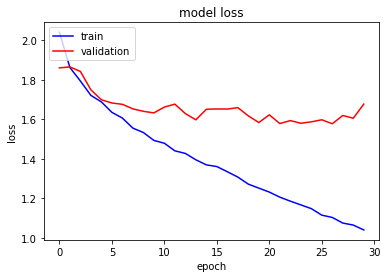

In [16]:
history = choose_hyperparams(1000, 'relu')
draw_acc_loss_plt(history)

### neuron size: 2000

loss: 0.9543927907943726, accuracy: 0.6848750114440918, val_loss: 1.6302049160003662, val_accuracy: 0.4334999918937683



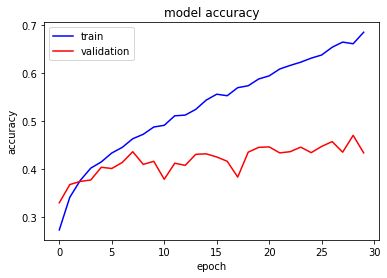

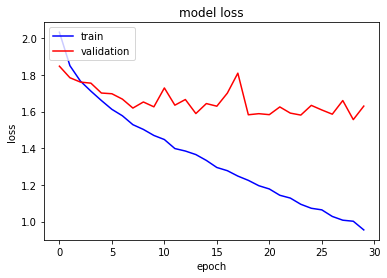

In [17]:
history = choose_hyperparams(2000, 'relu')
draw_acc_loss_plt(history)

### Since there was no significant difference between accuracy and loss when the number of neurons was 200 and 2,000, we chose 200, which is less.

## Activation function

### Activation function: elu

loss: 1.3164167404174805, accuracy: 0.550125002861023, val_loss: 1.6242643594741821, val_accuracy: 0.4339999854564667



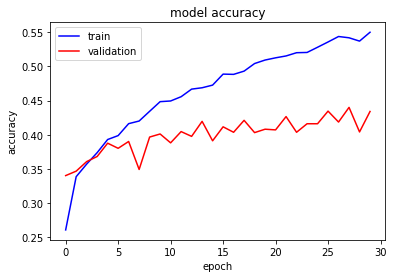

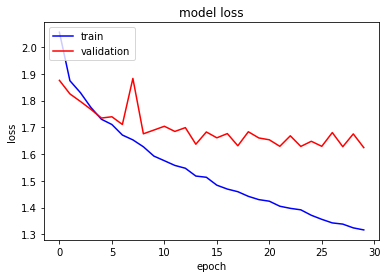

In [18]:
history = choose_hyperparams(200, 'elu')
draw_acc_loss_plt(history)

### Since the accuracy had decreased compared to when we used the Relu activation function, we chose the same Relu function to continue.

## Optimizers

### Optimizer: Adam

loss: 1.2728054523468018, accuracy: 0.5693749785423279, val_loss: 1.582701325416565, val_accuracy: 0.44850000739097595



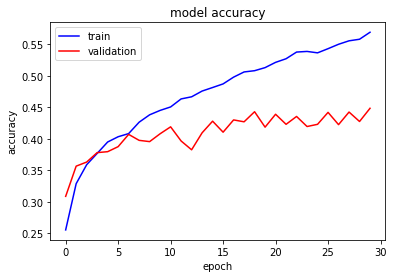

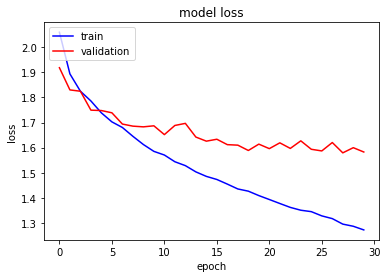

In [19]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### Optimizer: Nadam

loss: 1.237439751625061, accuracy: 0.5823749899864197, val_loss: 1.5872758626937866, val_accuracy: 0.429500013589859



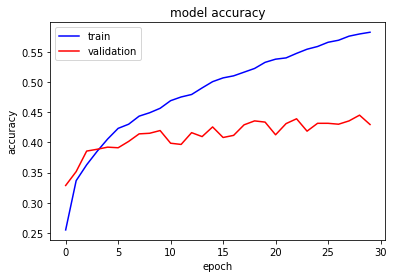

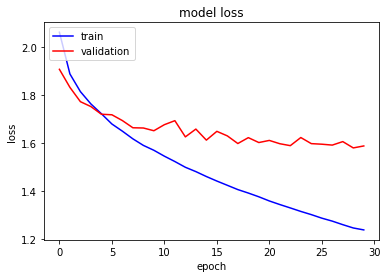

In [20]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### Optimizer: RMSprop

loss: 1.297142744064331, accuracy: 0.5488749742507935, val_loss: 1.619409441947937, val_accuracy: 0.421999990940094



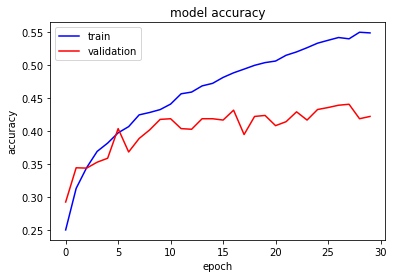

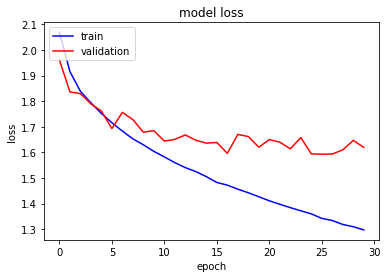

In [21]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### As it turns out, there is not much difference between the results of the three different optimizers, and as a result, we choose Adam because of its popularity and more common use.

## Learning rate

## Learning rate: 0.01

loss: 1.4423712491989136, accuracy: 0.4948750138282776, val_loss: 1.7428438663482666, val_accuracy: 0.3955000042915344



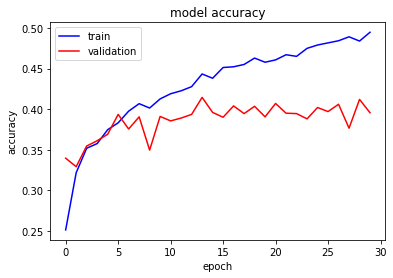

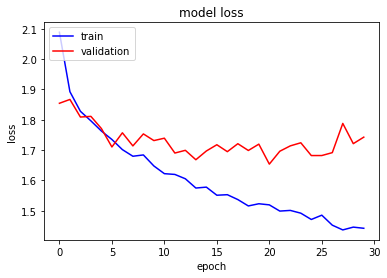

In [22]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

## Learning rate: 0.001

loss: 1.3661253452301025, accuracy: 0.5095000267028809, val_loss: 1.7849363088607788, val_accuracy: 0.3840000033378601



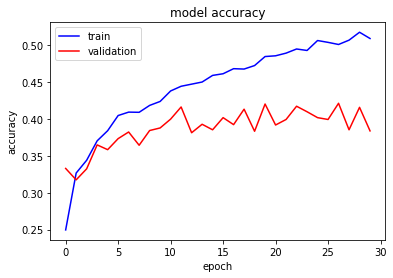

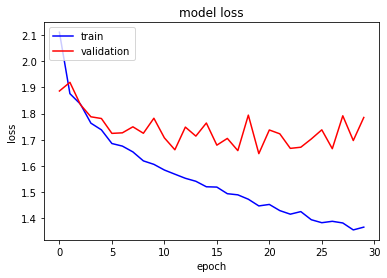

In [23]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

## Learning rate: 0.0001

loss: 1.278688669204712, accuracy: 0.5673750042915344, val_loss: 1.5912261009216309, val_accuracy: 0.4375



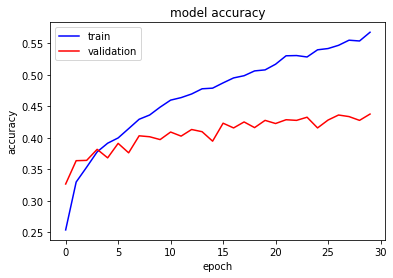

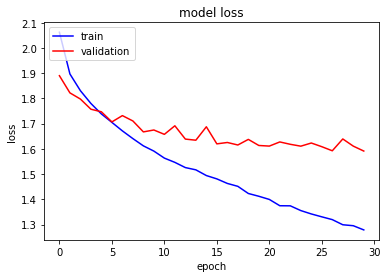

In [24]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### After examining the accuracies and losses, it can be concluded that 0.0001 is the best value for the learning rate.

## Layer size and count

loss: 0.8720225095748901, accuracy: 0.6927499771118164, val_loss: 1.7460055351257324, val_accuracy: 0.45100000500679016



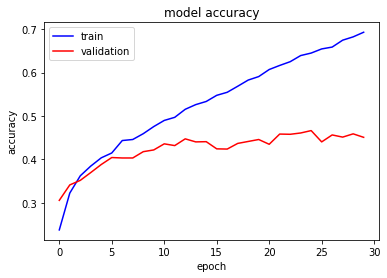

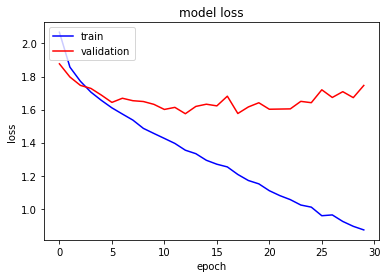

In [25]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### After examining the number of different layers and the number of various nodes for each layer, I came to the above combination. Due to a large number of multiple states, I set only the final form.

## Epochs and batch size number

### Epochs = 60

loss: 0.29895809292793274, accuracy: 0.9049999713897705, val_loss: 2.338578462600708, val_accuracy: 0.4560000002384186



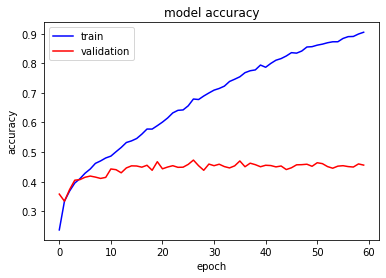

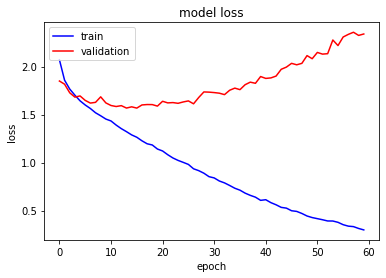

In [26]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=60, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

In [27]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.4406999945640564

### As it is known, with 60 epochs, the model suffers from over-fitting, and only the train accuracy is increased, and the validation accuracy remains constant. With an epoch number of less than 30, it becomes an underfit model. That's why we choose 30. Different values were selected and tested for batch size, which ultimately gave the best value of 32, but not all were mentioned due to the high number of cases.

# Train all 5 batches

In [28]:
# split training batch for validation
split = int(train_X.shape[0] * 0.2)
train_X_val = train_X[:split]
train_Y_val = train_Y[:split]

train_X = train_X[split:]
train_Y = train_Y[split:]
train_X.shape

(40000, 3072)

## Static

loss: 0.7744840383529663, accuracy: 0.7255499958992004, val_loss: 1.5092064142227173, val_accuracy: 0.5263000130653381



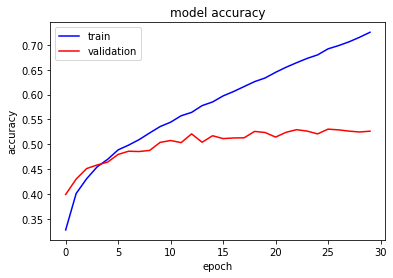

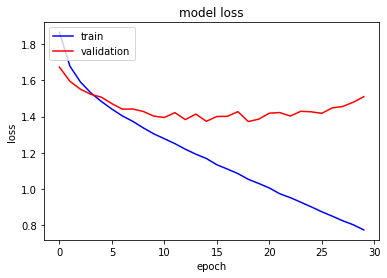

In [29]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_Y, batch_size=32, epochs=30, validation_data=(train_X_val, train_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

In [30]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.5164999961853027

## Dynamic using k-fold cross validation with k=5

In [31]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [32]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

train_acc_score = []
test_acc_score = []
_k = 5

# k-fold cross validation
for train_index , test_index in kf.split(train_X):
    X_train , X_test = train_X[train_index,:], train_X[test_index,:]
    y_train , y_test = train_Y[train_index] , train_Y[test_index]
    
    history = model.fit(X_train, y_train, batch_size=32, epochs=10)

    pred_train_values = np.argmax(model.predict(X_train), axis=1)
    pred_test_values = np.argmax(model.predict(X_test), axis=1)

    y_train_arg = np.argmax(y_train, axis=1)
    y_test_arg = np.argmax(y_test, axis=1)

    train_acc = accuracy_score(pred_train_values , y_train_arg)
    test_acc = accuracy_score(pred_test_values , y_test_arg)
    
    print('train accuracy: {}'.format(train_acc))
    print('test accuracy: {}'.format(test_acc))
    train_acc_score.append(train_acc)
    test_acc_score.append(test_acc)
    
train_avg_acc_score = sum(train_acc_score)/_k
test_avg_acc_score = sum(test_acc_score)/_k

Epoch 1/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.9049 - acc: 0.3080
Epoch 2/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.7114 - acc: 0.3852
Epoch 3/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.6253 - acc: 0.4172
Epoch 4/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.5616 - acc: 0.4409
Epoch 5/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.5165 - acc: 0.4595
Epoch 6/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4719 - acc: 0.4748
Epoch 7/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4368 - acc: 0.4878
Epoch 8/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4049 - acc: 0.5001
Epoch 9/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.3737 - acc: 0.5106
Epoch 10/10
1000/1000 [==============================] - 15s 15ms/step - loss: 1.3463 - acc: 0.5221
train acc

In [33]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.51419997215271

### As can be seen, k-fold cross-validation also has the same accuracy as static mode and there is not much difference between them.

## Confusion matrix

[[589  35  77  27  39  24   5  47  95  39]
 [ 32 624  12  16   8  11  11  18  65 180]
 [ 35  16 300  54  71  54  45  32   7  13]
 [ 47  33 121 396  91 247  98  67  49  48]
 [ 49   9 167  65 479  80 131  94  29  16]
 [ 27  26  88 174  64 398  61  83  30  26]
 [ 31  20 121 138 133  78 603  38  23  19]
 [ 25  20  79  61  77  72  22 574  16  40]
 [124  73  17  21  26  20   9  15 631  71]
 [ 41 144  18  48  12  16  15  32  55 548]]


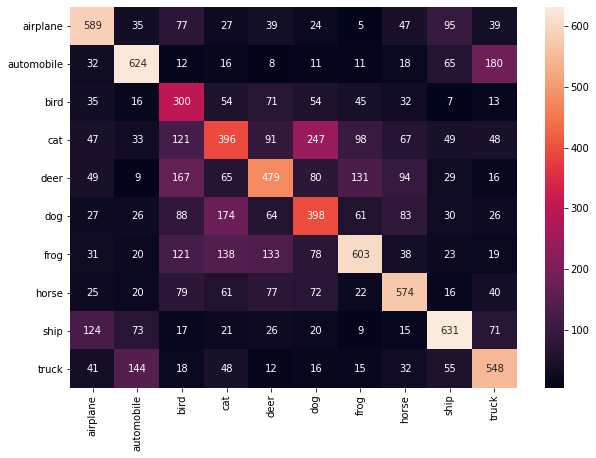

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn


pred_test_values = np.argmax(model.predict(test_X), axis=1)
y_test_arg = np.argmax(test_Y, axis=1)

cm = confusion_matrix(pred_test_values, y_test_arg)
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in target_labels],
                  columns = [i for i in target_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

## Accuracy, precision, recall, F1 Score

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_arg, pred_test_values, target_names=target_labels, digits=4))

              precision    recall  f1-score   support

    airplane     0.6029    0.5890    0.5959      1000
  automobile     0.6387    0.6240    0.6313      1000
        bird     0.4785    0.3000    0.3688      1000
         cat     0.3308    0.3960    0.3605      1000
        deer     0.4281    0.4790    0.4521      1000
         dog     0.4074    0.3980    0.4026      1000
        frog     0.5008    0.6030    0.5472      1000
       horse     0.5822    0.5740    0.5780      1000
        ship     0.6266    0.6310    0.6288      1000
       truck     0.5899    0.5480    0.5682      1000

    accuracy                         0.5142     10000
   macro avg     0.5186    0.5142    0.5133     10000
weighted avg     0.5186    0.5142    0.5133     10000



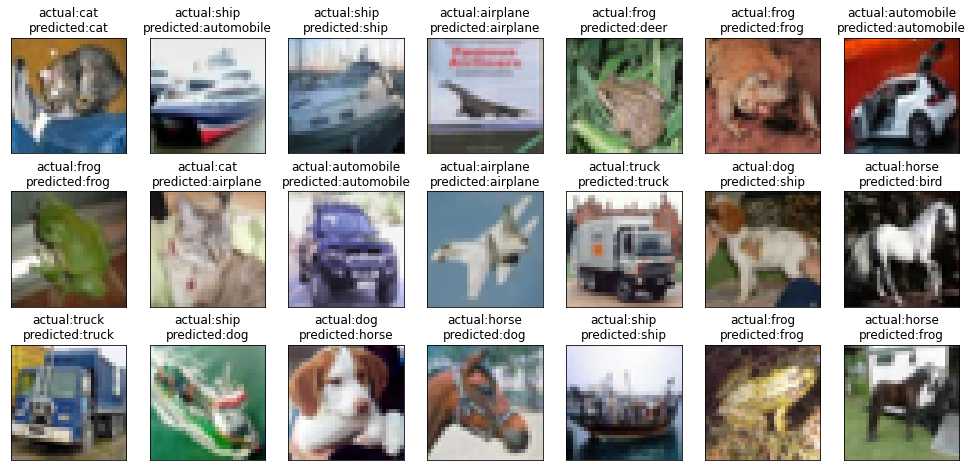

In [36]:
pred_test_values = pred_test_values.astype(int)
y_test_arg = y_test_arg.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + target_labels[y_test_arg[index]] + '\n' 
                            + 'predicted:' + target_labels[pred_test_values[index]])
        axes[i,j].imshow(test_X[index].reshape(32, 32, 3), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

## Grayscale

In [37]:
# split grayscale training batch for validation
split = int(train_X_grayscale.shape[0] * 0.2)
train_X_grayscale_val = train_X_grayscale[:split]
train_X_grayscale_val = train_X_grayscale_val.reshape(np.shape(train_X_grayscale_val)[0], -1)

train_X_grayscale = train_X_grayscale[split:]
train_X_grayscale = train_X_grayscale.reshape(np.shape(train_X_grayscale)[0], -1)
train_X_grayscale.shape
print(train_X_grayscale_val.shape)

(10000, 1024)


In [38]:
print(train_Y_val.shape)
print(train_X_grayscale.shape)
print(train_Y.shape)


(10000, 10)
(40000, 1024)
(40000, 10)


loss: 33.16139602661133, accuracy: 0.16727499663829803, val_loss: 32.83359146118164, val_accuracy: 0.17020000517368317



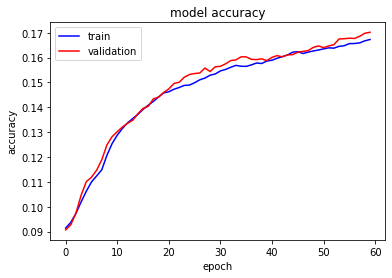

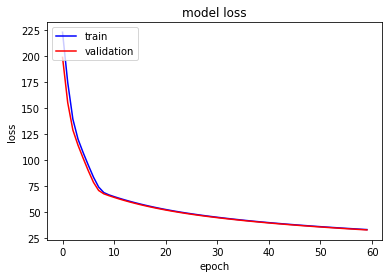

In [39]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=train_X_grayscale.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X_grayscale, train_Y, batch_size=64, epochs=60, validation_data=(train_X_grayscale_val, train_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)